In [1]:
import numpy as np
import pandas as pd
import time
import sqlite3
import matplotlib.pyplot as plt
from IPython import display
from PIL import Image
import matplotlib.patches as mpatches

%matplotlib inline

In [2]:
def szudzik(a, b):
    if(a >= b):
        return a * a + a + b
    else:
        return a + b * b

In [3]:
def combine(i, j, k):
    return szudzik(szudzik(i, j), k)

In [4]:
def szudzik_mapping(i_max, j_max, k_max):
    mapping = {}
    
    for i in np.arange(0, i_max + 1): 
        for j in np.arange(0, j_max + 1):
            for k in np.arange(0, k_max + 1):
                mapping[combine(i, j, k)] = (i, j, k)
    
    return mapping

In [5]:
def get_col_names(path,table_name):
#this works beautifully given that you know the table name
    conn = sqlite3.connect(path)
    c = conn.cursor()
    c.execute("select * from " + table_name)
    return table_name, [member[0] for member in c.description]

In [6]:
def sqlite_to_df(path, column_name):
    '''Take in path to sqlite file and return data frame of specified columns'''
    
    # Read sqlite query results into a pandas DataFrame
    con = sqlite3.connect(path)
    df = pd.read_sql_query("SELECT * FROM " + column_name, con)
    con.close()
    
    return df   

In [7]:
 try:
     
    # Making a connection between sqlite3
    # database and Python Program
    sqliteConnection = sqlite3.connect('network.sqlite')
     
    # If sqlite3 makes a connection with python
    # program then it will print "Connected to SQLite"
    # Otherwise it will show errors
    print("Connected to SQLite")
 
    # Getting all tables from sqlite_master
    sql_query = """SELECT name FROM sqlite_master
    WHERE type='table';"""
 
    # Creating cursor object using connection object
    cursor = sqliteConnection.cursor()
     
    # executing our sql query
    cursor.execute(sql_query)
    print("List of tables\n")
     
    # printing all tables list
    print(cursor.fetchall())
 
except sqlite3.Error as error:
    print("Failed to execute the above query", error)
     
finally:
   
    # Inside Finally Block, If connection is
    # open, we need to close it
    if sqliteConnection:
         
        # using close() method, we will close
        # the connection
        sqliteConnection.close()
         
        # After closing connection object, we
        # will print "the sqlite connection is
        # closed"
        print("the sqlite connection is closed")

Connected to SQLite
List of tables

[('metadata',), ('reactions',)]
the sqlite connection is closed


In [8]:
path= r"network.sqlite"
print(get_col_names(path,'metadata'))
print(get_col_names(path,'reactions'))

('metadata', ['number_of_species', 'number_of_reactions'])
('reactions', ['reaction_id', 'number_of_reactants', 'number_of_products', 'reactant_1', 'reactant_2', 'product_1', 'product_2', 'phase_reactant_1', 'phase_reactant_2', 'phase_product_1', 'phase_product_2', 'dG', 'prefactor', 'rate', 'electron_tunneling_coefficient', 'reorganization_energy', 'charge_transfer_coefficient', 'type'])


In [9]:
'''
TABLES IN STATE.SQLITE
('initial_state',), ('trajectories',), ('factors',), ('interrupt_state',), ('interrupt_cutoff',)

TABLE AND THEIR COLUMN NAMES IN STATE.SQLITE
('initial_state', ['species_id', 'count'])
('trajectories', ['seed', 'step', 'time', 'reaction_id', 'site_1_mapping', 'site_2_mapping'])
('factors', ['factor_zero', 'factor_two', 'factor_duplicate'])
('interrupt_state', ['seed', 'species_id', 'quantity', 'site_mapping', 'edge (new)'])
edge means the edge of the lattice. For dynamic lattice checkpointing

('interrupt_cutoff', ['seed', 'step', 'time','maxk (new)'])
maxk means the upper limit of the z_max growth. For the dynamic lattice checkpointing

'''

"\nTABLES IN STATE.SQLITE\n('initial_state',), ('trajectories',), ('factors',), ('interrupt_state',), ('interrupt_cutoff',)\n\nTABLE AND THEIR COLUMN NAMES IN STATE.SQLITE\n('initial_state', ['species_id', 'count'])\n('trajectories', ['seed', 'step', 'time', 'reaction_id', 'site_1_mapping', 'site_2_mapping'])\n('factors', ['factor_zero', 'factor_two', 'factor_duplicate'])\n('interrupt_state', ['seed', 'species_id', 'quantity', 'site_mapping', 'edge (new)'])\nedge means the edge of the lattice. For dynamic lattice checkpointing\n\n('interrupt_cutoff', ['seed', 'step', 'time','maxk (new)'])\nmaxk means the upper limit of the z_max growth. For the dynamic lattice checkpointing\n\n"

In [10]:
'''
TABLES IN NETWORK.SQLITE
('metadata',), ('reactions',)

TABLE AND THEIR COLUMN NAMES IN NETWORK.SQLITE
('metadata', ['number_of_species', 'number_of_reactions'])
('reactions', ['reaction_id', 'number_of_reactants', 'number_of_products', 'reactant_1', 'reactant_2', 'product_1', 'product_2', 'phase_reactant_1', 'phase_reactant_2', 'phase_product_1', 'phase_product_2', 'dG', 'prefactor', 'rate', 'electron_tunneling_coefficient', 'reorganization_energy', 'charge_transfer_coefficient', 'type'])
'''

"\nTABLES IN NETWORK.SQLITE\n('metadata',), ('reactions',)\n\nTABLE AND THEIR COLUMN NAMES IN NETWORK.SQLITE\n('metadata', ['number_of_species', 'number_of_reactions'])\n('reactions', ['reaction_id', 'number_of_reactants', 'number_of_products', 'reactant_1', 'reactant_2', 'product_1', 'product_2', 'phase_reactant_1', 'phase_reactant_2', 'phase_product_1', 'phase_product_2', 'dG', 'prefactor', 'rate', 'electron_tunneling_coefficient', 'reorganization_energy', 'charge_transfer_coefficient', 'type'])\n"

In [12]:
path = r"state-static-correct.sqlite"
initial_state_df = sqlite_to_df(path, "initial_state")
trajectories_df = sqlite_to_df(path, "trajectories")
factors_df = sqlite_to_df(path, "factors")
interrupt_state_df = sqlite_to_df(path, "interrupt_state")
interrupt_cutoff_df = sqlite_to_df(path, "interrupt_cutoff")

In [13]:
path = r"network.sqlite"
metadata_df = sqlite_to_df(path, "metadata")
reactions_df = sqlite_to_df(path, "reactions")

In [14]:
print(metadata_df.head())
print(metadata_df.shape)

   number_of_species  number_of_reactions
0                  5                    9
(1, 2)


In [15]:
print(reactions_df.shape)
reactions_df.head()

(9, 18)


,reaction_id,number_of_reactants,number_of_products,reactant_1,reactant_2,product_1,product_2,phase_reactant_1,phase_reactant_2,phase_product_1,phase_product_2,dG,prefactor,rate,electron_tunneling_coefficient,reorganization_energy,charge_transfer_coefficient,type
0,0,2,1,0,1,1,-1,L,S,L,N,-100.0,1.00,1000000.0,0.0,0.0,0.0,A
1,1,2,1,0,4,4,-1,L,S,L,N,-100.0,1.00,1000.0,0.0,0.0,0.0,A
2,2,1,2,4,-1,0,4,L,N,L,S,-100.0,1.00,1000.0,0.0,0.0,0.0,D
3,3,1,1,4,-1,3,-1,L,N,L,N,0.0,0.02,0.0,1.2,0.0,0.5,O
4,4,1,1,3,-1,4,-1,L,N,L,N,0.0,100000.00,0.0,1.2,0.0,0.5,R


In [16]:
interrupt_state_df.seed.value_counts()
# only one simulation?

0    7505
Name: seed, dtype: int64

In [17]:
site_mapping = szudzik_mapping(i_max=49,j_max=49,k_max=2)

In [18]:
np.array(list(site_mapping.keys())).max()

6247502

In [19]:
interrupt_state_df.site_mapping.max()

6247502

In [27]:
interrupt_state_df.site_mapping.value_counts()

-2          5
 43         1
 5960922    1
 5965806    1
 5970692    1
           ..
 158        1
 422        1
 932        1
 1808       1
 6123151    1
Name: site_mapping, Length: 7501, dtype: int64

In [28]:
50*50*3 - 1
#matches
# i_range = 0 - 49
# j_range = 0 - 49
# k_range = 0 - 3

7499

In [29]:
trajectories_df.head()

,seed,step,time,reaction_id,site_1_mapping,site_2_mapping
0,0,0,2.885977e-13,0,4930622,-2
1,0,1,2.972319e-13,0,253514,-2
2,0,2,4.125108e-13,0,3592922,-2
3,0,3,4.595902e-13,0,5491994,-2
4,0,4,5.076430e-13,0,1867324,-2


In [30]:
reactions_df

,reaction_id,number_of_reactants,number_of_products,reactant_1,reactant_2,product_1,product_2,phase_reactant_1,phase_reactant_2,phase_product_1,phase_product_2,dG,prefactor,rate,electron_tunneling_coefficient,reorganization_energy,charge_transfer_coefficient,type
0,0,2,1,0,1,1,-1,L,S,L,N,-100.0,1.0000,1000000.0,0.0,0.0,0.0,A
1,1,2,1,0,4,4,-1,L,S,L,N,-100.0,1.0000,1000.0,0.0,0.0,0.0,A
2,2,1,2,4,-1,0,4,L,N,L,S,-100.0,1.0000,1000.0,0.0,0.0,0.0,D
3,3,1,1,4,-1,3,-1,L,N,L,N,0.0,0.0200,0.0,1.2,0.0,0.5,O
4,4,1,1,3,-1,4,-1,L,N,L,N,0.0,100000.0000,0.0,1.2,0.0,0.5,R
5,5,2,2,1,3,2,0,L,L,L,L,0.0,0.8432,0.0,1.2,0.0,0.5,O
6,6,1,2,2,-1,0,2,L,N,L,S,-100.0,1.0000,100000.0,0.0,0.0,0.0,D
7,7,2,2,0,1,0,1,L,L,L,L,0.0,1.0000,1.0,0.0,0.0,0.0,F
8,8,2,2,0,4,0,4,L,L,L,L,0.0,1.0000,1.0,0.0,0.0,0.0,F


In [31]:
#reaction descriptions
# reactant_id = 0 lattice , 1 Homogeneous; product_id = 1 Lattice # Essentially an adsorption reaction
# reactant_id = 0 lattice , 4 Homogoneous; product_id = 4 Lattice # Essentially an adsorption reaction
# reactant_id = 4 lattice; product_id = 0 Lattice , 4 Homogeneous # Essentially a desorption reaction
# reactant_id = 4 lattice; product_id = 3 Lattice # Essentially a electrochemical reaction 
# reactant_id = 3 lattice; product_id = 4 Lattice # Essentially a electrochemical reaction
# reactant_id = 1 lattice, 3 lattice; product_id = 2 lattice ,0 lattice # Essentially a electrochemical reaction
# reactant_id = 4 lattice; product_id = 0 Lattice , 4 Homogeneous # Essentially a desorption reaction
# reactant_id = 4 lattice; product_id = 0 Lattice , 4 Homogeneous # Essentially a desorption reaction
# 0 means empty lattice

In [32]:
# worrying about one reaction at a time.
# consider only reaction_id = 0

In [33]:
# consider only reaction_id = 0
# reactant_id = 0 lattice , 1 Homogeneous
# product_id = 1 Lattice
reaction_id_zero_df = trajectories_df[trajectories_df['reaction_id'] == 0]

In [34]:
reactions_df[reactions_df['reaction_id'] == 4]
# adsoption of 1 on the surface

,reaction_id,number_of_reactants,number_of_products,reactant_1,reactant_2,product_1,product_2,phase_reactant_1,phase_reactant_2,phase_product_1,phase_product_2,dG,prefactor,rate,electron_tunneling_coefficient,reorganization_energy,charge_transfer_coefficient,type
4,4,1,1,3,-1,4,-1,L,N,L,N,0.0,100000.0,0.0,1.2,0.0,0.5,R


In [35]:
reactions_df[reactions_df['reaction_id'] == 5]

,reaction_id,number_of_reactants,number_of_products,reactant_1,reactant_2,product_1,product_2,phase_reactant_1,phase_reactant_2,phase_product_1,phase_product_2,dG,prefactor,rate,electron_tunneling_coefficient,reorganization_energy,charge_transfer_coefficient,type
5,5,2,2,1,3,2,0,L,L,L,L,0.0,0.8432,0.0,1.2,0.0,0.5,O


In [36]:
reaction_id_zero_df.head()

,seed,step,time,reaction_id,site_1_mapping,site_2_mapping
0,0,0,2.885977e-13,0,4930622,-2
1,0,1,2.972319e-13,0,253514,-2
2,0,2,4.125108e-13,0,3592922,-2
3,0,3,4.595902e-13,0,5491994,-2
4,0,4,5.076430e-13,0,1867324,-2


In [37]:
# slice by step or time

In [38]:
trajectories_df.step.unique()

array([     0,      1,      2, ..., 399998, 399999, 400000])

In [39]:
trajectories_df[trajectories_df['step'] == 0]

,seed,step,time,reaction_id,site_1_mapping,site_2_mapping
0,0,0,2.885977e-13,0,4930622,-2


<AxesSubplot:xlabel='step'>

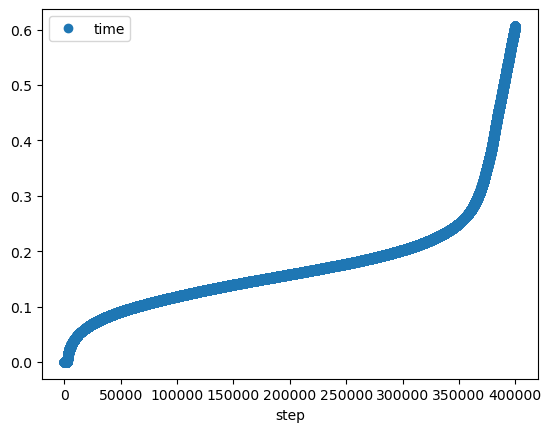

In [40]:
trajectories_df.plot(x='step', y='time', style='o')

In [41]:
'''
Type of reactions
A: adsorption
D: desorption
O: oxidation
R: reduction
F: Diffusion
'''

'\nType of reactions\nA: adsorption\nD: desorption\nO: oxidation\nR: reduction\nF: Diffusion\n'

In [64]:
step_list = np.arange(0,trajectories_df.step.max())
trajectories_df.step.max()

400000

In [43]:
trajectories_df[trajectories_df['reaction_id'] == 5]

,seed,step,time,reaction_id,site_1_mapping,site_2_mapping
2527,0,2527,0.000211,5,7312,7484
2826,0,2826,0.007357,5,4361834,4357658
3073,0,3073,0.011079,5,1224344,1222132
3101,0,3101,0.011469,5,704762,706442
3103,0,3103,0.011483,5,4754582,4361834
...,...,...,...,...,...,...
381948,0,381948,0.418567,5,1637120,1634562
384658,0,384658,0.448677,5,3067754,3067753
390923,0,390923,0.512526,5,4332644,4332643
391616,0,391616,0.520189,5,2305843,2080807


In [44]:
reactions_df[reactions_df['reaction_id'] == 5]

,reaction_id,number_of_reactants,number_of_products,reactant_1,reactant_2,product_1,product_2,phase_reactant_1,phase_reactant_2,phase_product_1,phase_product_2,dG,prefactor,rate,electron_tunneling_coefficient,reorganization_energy,charge_transfer_coefficient,type
5,5,2,2,1,3,2,0,L,L,L,L,0.0,0.8432,0.0,1.2,0.0,0.5,O


In [45]:
reactions_df[reactions_df['reaction_id'] == 6]

,reaction_id,number_of_reactants,number_of_products,reactant_1,reactant_2,product_1,product_2,phase_reactant_1,phase_reactant_2,phase_product_1,phase_product_2,dG,prefactor,rate,electron_tunneling_coefficient,reorganization_energy,charge_transfer_coefficient,type
6,6,1,2,2,-1,0,2,L,N,L,S,-100.0,1.0,100000.0,0.0,0.0,0.0,D


In [46]:
trajectories_df

,seed,step,time,reaction_id,site_1_mapping,site_2_mapping
0,0,0,2.885977e-13,0,4930622,-2
1,0,1,2.972319e-13,0,253514,-2
2,0,2,4.125108e-13,0,3592922,-2
3,0,3,4.595902e-13,0,5491994,-2
4,0,4,5.076430e-13,0,1867324,-2
...,...,...,...,...,...,...
399996,0,399996,6.067982e-01,2,3241802,-2
399997,0,399997,6.067982e-01,1,3241802,-2
399998,0,399998,6.068298e-01,2,158,-2
399999,0,399999,6.068299e-01,1,158,-2


In [51]:
reactions_df[reactions_df['reaction_id'] == 5]

,reaction_id,number_of_reactants,number_of_products,reactant_1,reactant_2,product_1,product_2,phase_reactant_1,phase_reactant_2,phase_product_1,phase_product_2,dG,prefactor,rate,electron_tunneling_coefficient,reorganization_energy,charge_transfer_coefficient,type
5,5,2,2,1,3,2,0,L,L,L,L,0.0,0.8432,0.0,1.2,0.0,0.5,O


In [68]:
def update_lattice(current_lattice,step):
    site_1 = trajectories_df[trajectories_df['step'] == step].site_1_mapping.values[0]
    site_2 = trajectories_df[trajectories_df['step'] == step].site_2_mapping.values[0]
    current_reaction_id = trajectories_df[trajectories_df['step'] == step].reaction_id.values[0]
    num_reactants = reactions_df[reactions_df['reaction_id'] == current_reaction_id].number_of_reactants.values[0]
    num_products = reactions_df[reactions_df['reaction_id'] == current_reaction_id].number_of_products.values[0]
    reaction_type = reactions_df[reactions_df['reaction_id'] == current_reaction_id].type.values[0]
    if reaction_type == 'A':
        # Adsorption
        print(step,"Adsorption")
        if site_2 == -2:
            a_lattice_site = site_1
            a_species_id = reactions_df[reactions_df['reaction_id'] == current_reaction_id].product_1.values[0]
            a_x, a_y, a_z = site_mapping[a_lattice_site]
            current_lattice[a_x, a_y, a_z] = a_species_id
        else:
            a_lattice_site = site_2
            a_species_id = reactions_df[reactions_df['reaction_id'] == current_reaction_id].product_2.values[0]
            a_x, a_y, a_z = site_mapping[a_lattice_site]
            current_lattice[a_x, a_y, a_z] = a_species_id
    if reaction_type == 'D':
        #Desorption
        print(step,"Desorption")
        if site_2 == -2:
            d_lattice_site = site_1
            d_species_id = reactions_df[reactions_df['reaction_id'] == current_reaction_id].product_2.values[0]
            d_x, d_y, d_z = site_mapping[d_lattice_site]
            current_lattice[d_x, d_y, d_z] = 0
        else:
            d_lattice_site = site_2
            d_species_id = reactions_df[reactions_df['reaction_id'] == current_reaction_id].product_1.values[0]
            d_x, d_y, d_z = site_mapping[d_lattice_site]
            current_lattice[d_x, d_y, d_z] = 0
    if reaction_type == 'F':
        print(step,"Diffusion")
        if reactions_df[reactions_df['reaction_id'] == current_reaction_id].reactant_1.values[0] == 0:
            #reactant_1 is lattice 
            reactant_lattice_site = site_1
            species_site = site_2
            species_id = 0
            if reactions_df[reactions_df['reaction_id'] == current_reaction_id].product_2.values[0] != 0:
                # if product 2 is the species
                species_id = reactions_df[reactions_df['reaction_id'] == current_reaction_id].product_2.values[0]
            if reactions_df[reactions_df['reaction_id'] == current_reaction_id].product_1.values[0] != 0:
                # if product 1 is the species
                species_id = reactions_df[reactions_df['reaction_id'] == current_reaction_id].product_1.values[0]
            l_x, l_y, l_z = site_mapping[reactant_lattice_site]
            s_x, s_y, s_z = site_mapping[species_site]
            current_lattice[l_x, l_y, l_z] = species_id
            current_lattice[s_x, s_y, s_z] = 0

        if reactions_df[reactions_df['reaction_id'] == current_reaction_id].reactant_2.values[0] == 0:
            #reactant_2 is lattice 
            reactant_lattice_site = site_2
            species_site = site_1
            species_id = 0
            if reactions_df[reactions_df['reaction_id'] == current_reaction_id].product_2.values[0] != 0:
                # if product 2 is the species
                species_id = reactions_df[reactions_df['reaction_id'] == current_reaction_id].product_2.values[0]
            if reactions_df[reactions_df['reaction_id'] == current_reaction_id].product_1.values[0] != 0:
                # if product 1 is the species
                species_id = reactions_df[reactions_df['reaction_id'] == current_reaction_id].product_1.values[0]
            l_x, l_y, l_z = site_mapping[reactant_lattice_site]
            s_x, s_y, s_z = site_mapping[species_site]
            current_lattice[l_x, l_y, l_z] = species_id
            current_lattice[s_x, s_y, s_z] = 0
    if reaction_type == 'R':
        print(step,"Reduction")
        num_reactants = reactions_df[reactions_df['reaction_id'] == current_reaction_id].number_of_reactants.values[0]
        if num_reactants == 1:
            red_reactant_id = reactions_df[reactions_df['reaction_id'] == current_reaction_id].reactant_1.values[0]
            red_product_id =  reactions_df[reactions_df['reaction_id'] == current_reaction_id].product_1.values[0]
            red_site = site_1
            r_x, r_y, r_z = site_mapping[red_site]
            current_lattice[o_x, o_y, o_z] = red_product_id        
            
    if reaction_type == 'O':
        num_reactants = reactions_df[reactions_df['reaction_id'] == current_reaction_id].number_of_reactants.values[0]
        if num_reactants == 1:
            print(step,"Oxidation-electron loss")
            oxi_reactant_id = reactions_df[reactions_df['reaction_id'] == current_reaction_id].reactant_1.values[0]
            oxi_product_id =  reactions_df[reactions_df['reaction_id'] == current_reaction_id].product_1.values[0]
            oxi_site = site_1
            o_x, o_y, o_z = site_mapping[oxi_site]
            current_lattice[o_x, o_y, o_z] = oxi_product_id
        
        if num_reactants == 2:
            print(step,"Oxidation-oxygen addition")
            oxi_reactant_1_id = reactions_df[reactions_df['reaction_id'] == current_reaction_id].reactant_1.values[0]
            oxi_reactant_2_id = reactions_df[reactions_df['reaction_id'] == current_reaction_id].reactant_2.values[0]
            
            oxi_product_id = 0
            p = 0
            if reactions_df[reactions_df['reaction_id'] == current_reaction_id].product_1.values[0] == 0:
                oxi_product_id = reactions_df[reactions_df['reaction_id'] == current_reaction_id].product_2.values[0]
                p = 2
            else:
                oxi_product_id = reactions_df[reactions_df['reaction_id'] == current_reaction_id].product_1.values[0]
                p = 1 
            
            
            oxi_reactant_1_site = site_1
            oxi_reactant_2_site = site_2
            
            o1_x, o1_y, o1_z = site_mapping[oxi_reactant_1_site]
            o2_x, o2_y, o2_z = site_mapping[oxi_reactant_2_site]

            if p == 1:
                current_lattice[o1_x, o1_y, o1_z] = oxi_product_id
                current_lattice[o2_x, o2_y, o2_z] = 0
            else:
                current_lattice[o1_x, o1_y, o1_z] = 0
                current_lattice[o2_x, o2_y, o2_z] = oxi_product_id

    return

In [69]:
trajectories_df[trajectories_df['reaction_id'] == 5].head()

,seed,step,time,reaction_id,site_1_mapping,site_2_mapping
2527,0,2527,0.000211,5,7312,7484
2826,0,2826,0.007357,5,4361834,4357658
3073,0,3073,0.011079,5,1224344,1222132
3101,0,3101,0.011469,5,704762,706442
3103,0,3103,0.011483,5,4754582,4361834


In [70]:
trajectories_df[trajectories_df['reaction_id'] == 6].head()

,seed,step,time,reaction_id,site_1_mapping,site_2_mapping
2531,0,2531,0.000226,6,7312,-2
2828,0,2828,0.007357,6,4361834,-2
3075,0,3075,0.011083,6,1224344,-2
3105,0,3105,0.011487,6,704762,-2
3111,0,3111,0.011499,6,4754582,-2


In [71]:
trajectories_df.head()

,seed,step,time,reaction_id,site_1_mapping,site_2_mapping
0,0,0,2.885977e-13,0,4930622,-2
1,0,1,2.972319e-13,0,253514,-2
2,0,2,4.125108e-13,0,3592922,-2
3,0,3,4.595902e-13,0,5491994,-2
4,0,4,5.076430e-13,0,1867324,-2


In [72]:
trajectories_df.step.describe()

count    400001.000000
mean     200000.000000
std      115470.486851
min           0.000000
25%      100000.000000
50%      200000.000000
75%      300000.000000
max      400000.000000
Name: step, dtype: float64

In [73]:
# print lattice after purely for checking update lattice

In [74]:
#current_lattice[11,47,2]  checking for 1st step manually

In [75]:
#current_lattice.shape

In [79]:
import matplotlib.pyplot as plt
import numpy as np

color_code = ['#F8F8FF','#EE3B3B', '#228B22','#FF00FF','#FFA54F']
'''
F8F8FF - white
EE3B3B - red
228B22 - green
FF00FF - magneta
FFA54F - tan
'''
lattice_patch = mpatches.Patch(color='#F8F8FF', label='Lattice')
co_patch = mpatches.Patch(color='#EE3B3B', label='CO')
h20_patch = mpatches.Patch(color='#228B22', label='CO2')
oh_patch = mpatches.Patch(color='#FF00FF', label='OH')
co2_patch = mpatches.Patch(color='#FFA54F', label='H2O')

species_list = [0,1,2,3,4]
#0 - lattice
#1 - CO
#2 - CO2
#3 - OH
#4 - H20

def visualize(current_lattice,start_step,end_step):
    #plt.ion()
    for step in np.arange(start_step,end_step):
        # build up the numpy logo
        update_lattice(current_lattice,step)
        with open('./lattice_v2/' + str(step) + '.npy', 'wb') as f:
            np.save(f, current_lattice)
        
        n_voxels = current_lattice.astype(dtype=bool)
        facecolors = np.zeros(n_voxels.shape).astype(dtype='str')
        for species_id in species_list:
            facecolors[current_lattice == species_id] = color_code[species_id]
        edgecolors = np.where(n_voxels, '#EE3B3B', '#7D84A6')
        #print(facecolors[facecolors == '#228B22'])
        filled = np.ones(n_voxels.shape)

        x, y, z = np.indices(np.array(filled.shape)+1).astype(float)
        ax = plt.figure(figsize=(10,10)).add_subplot(projection='3d')
        ax.voxels(x, y, z, filled, facecolors=facecolors, edgecolors=edgecolors)
        ax.set_box_aspect([100,100,10])
        #display.draw_idle()
        ax.set_xticks(np.arange(0,50,10))
        ax.set_yticks(np.arange(0,50,10))
        ax.set_zticks(np.arange(0,4))

        plt.legend(handles=[lattice_patch,co_patch,h20_patch,oh_patch,co2_patch])
        if step%100 == 0:
            plt.savefig("./images_v2/" + str(step)+ ".jpg")
            plt.close()
     
        '''
        plt.show()
        display.display(plt.gcf())
        display.clear_output(wait=True)
        time.sleep(1)
        '''
        
        '''
        ax.canvas.flush_events()
        time.sleep(1)
        '''
        #plt.ioff()
    images = [Image.open("./images_v2/" + str(step)+ ".jpg") for step in np.arange(0,max_steps)]
    images[0].save('multiple_adsorption_v.gif', save_all=True, append_images=images[1:], duration=100, loop=0)
    return

In [ ]:
start_lattice = np.zeros((50,50,3))
current_lattice = start_lattice
visualize(current_lattice,0,trajectories_df.step.max()+1)

0 Adsorption
1 Adsorption
2 Adsorption
3 Adsorption
4 Adsorption
5 Adsorption
6 Adsorption
7 Adsorption
8 Adsorption
9 Adsorption
10 Adsorption
11 Adsorption
12 Adsorption
13 Adsorption
14 Adsorption
15 Adsorption
16 Adsorption
17 Adsorption
18 Adsorption
19 Adsorption
20 Adsorption
21 Adsorption


/var/folders/fw/wxq5vrx90sj95fnh6dd1g5hc0000gn/T/ipykernel_69007/2809764167.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  ax = plt.figure(figsize=(10,10)).add_subplot(projection='3d')


22 Adsorption
23 Adsorption
24 Adsorption
25 Adsorption
26 Adsorption
27 Adsorption
28 Adsorption
29 Adsorption
30 Adsorption
31 Adsorption
32 Adsorption
33 Adsorption
34 Adsorption
35 Adsorption
36 Adsorption
37 Adsorption
38 Adsorption
39 Adsorption
40 Adsorption
41 Adsorption
42 Adsorption
43 Adsorption
44 Adsorption
45 Adsorption
46 Adsorption
47 Adsorption
48 Adsorption
49 Adsorption
50 Adsorption
51 Adsorption
52 Adsorption
53 Adsorption
54 Adsorption
55 Adsorption
56 Adsorption
57 Adsorption
58 Adsorption
59 Adsorption
60 Adsorption
61 Adsorption
62 Adsorption
63 Adsorption
64 Adsorption
65 Adsorption
66 Adsorption
67 Adsorption
68 Adsorption
69 Adsorption
70 Adsorption
71 Adsorption
72 Adsorption
73 Adsorption
74 Adsorption
75 Adsorption
76 Adsorption
77 Adsorption
78 Adsorption
79 Adsorption
80 Adsorption
81 Adsorption
82 Adsorption
83 Adsorption
84 Adsorption
85 Adsorption
86 Adsorption
87 Adsorption
88 Adsorption
89 Adsorption
90 Adsorption
91 Adsorption
92 Adsorption
93 Ads

In [ ]:
current_lattice = np.load('./lattice_v2/2600.npy')
visualize(current_lattice,2600,300001)

2600 Desorption
2601 Adsorption
2602 Desorption
2603 Adsorption
2604 Desorption
2605 Adsorption
2606 Desorption
2607 Adsorption
2608 Diffusion
2609 Desorption
2610 Adsorption
2611 Adsorption
2612 Desorption
2613 Adsorption
2614 Desorption
2615 Desorption
2616 Adsorption
2617 Adsorption
2618 Desorption
2619 Adsorption
2620 Desorption
2621 Adsorption
2622 Desorption
2623 Adsorption
2624 Desorption
2625 Adsorption
2626 Desorption
2627 Adsorption
2628 Desorption
2629 Adsorption
2630 Desorption
2631 Adsorption
2632 Desorption
2633 Adsorption
2634 Desorption
2635 Adsorption
2636 Desorption
2637 Adsorption
2638 Desorption
2639 Adsorption
2640 Desorption
2641 Adsorption
2642 Desorption
2643 Adsorption
2644 Desorption
2645 Adsorption
2646 Desorption
2647 Adsorption
2648 Desorption
2649 Adsorption
2650 Desorption
2651 Adsorption
2652 Desorption
2653 Adsorption
2654 Desorption
2655 Adsorption
2656 Desorption
2657 Adsorption
2658 Desorption
2659 Adsorption
2660 Desorption
2661 Adsorption
2662 Deso

3100 Desorption
3101 Adsorption
3102 Desorption
3103 Adsorption
3104 Desorption
3105 Adsorption
3106 Desorption
3107 Adsorption
3108 Desorption
3109 Desorption
3110 Adsorption
3111 Adsorption
3112 Desorption
3113 Adsorption
3114 Oxidation-oxygen addition
3115 Adsorption
3116 Desorption
3117 Adsorption
3118 Desorption
3119 Adsorption
3120 Desorption
3121 Adsorption
3122 Desorption
3123 Adsorption
3124 Desorption
3125 Adsorption
3126 Desorption
3127 Adsorption
3128 Desorption
3129 Adsorption
3130 Desorption
3131 Adsorption
3132 Desorption
3133 Adsorption
3134 Desorption
3135 Adsorption
3136 Desorption
3137 Adsorption
3138 Desorption
3139 Adsorption
3140 Desorption
3141 Adsorption
3142 Desorption
3143 Adsorption
3144 Desorption
3145 Adsorption
3146 Desorption
3147 Adsorption
3148 Desorption
3149 Adsorption
3150 Desorption
3151 Adsorption
3152 Desorption
3153 Adsorption
3154 Desorption
3155 Adsorption
3156 Desorption
3157 Adsorption
3158 Desorption
3159 Adsorption
3160 Desorption
3161 Adso

3606 Desorption
3607 Adsorption
3608 Desorption
3609 Adsorption
3610 Desorption
3611 Adsorption
3612 Desorption
3613 Adsorption
3614 Desorption
3615 Adsorption
3616 Desorption
3617 Adsorption
3618 Desorption
3619 Adsorption
3620 Desorption
3621 Adsorption
3622 Desorption
3623 Adsorption
3624 Desorption
3625 Adsorption
3626 Desorption
3627 Adsorption
3628 Desorption
3629 Adsorption
3630 Desorption
3631 Adsorption
3632 Desorption
3633 Adsorption
3634 Oxidation-oxygen addition
3635 Adsorption
3636 Desorption
3637 Adsorption
3638 Desorption
3639 Adsorption
3640 Desorption
3641 Adsorption
3642 Desorption
3643 Adsorption
3644 Desorption
3645 Adsorption
3646 Desorption
3647 Adsorption
3648 Desorption
3649 Adsorption
3650 Desorption
3651 Adsorption
3652 Desorption
3653 Adsorption
3654 Desorption
3655 Adsorption
3656 Desorption
3657 Adsorption
3658 Desorption
3659 Adsorption
3660 Desorption
3661 Adsorption
3662 Desorption
3663 Adsorption
3664 Desorption
3665 Adsorption
3666 Desorption
3667 Adso

In [63]:
300001/100

3000.01

In [4]:
images = [Image.open("./images_v2/" + str(step)+ ".jpg") for step in np.arange(0,4065)]
images[0].save('multiple_adsorption_v2.gif', save_all=True, append_images=images[1:], duration=100, loop=0)

In [5]:
images = [Image.open("./images_v2/" + str(step)+ ".jpg") for step in np.arange(0,4065) if step%100 == 0]
images[0].save('all_reactions_100x.gif', save_all=True, append_images=images[1:], duration=100, loop=0)